## Final Project Submission


a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

From our stakehodlers perspective they want to give advice to their clients whether renovation is relevant for their house?

Some of the questions worth answering for our stakeholders are:
1. Did renovation actually created some measurable difference in the sales price of the houses 
2. Relevance of time since renovation, which might be used to advice home buyers whether renovation is due or not?
3. Relevance of renovation is different zipcodes? So that our stakeholders can customize the advice based on zipcodes the 
concerned house is located in?



In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Your code here - remember to use markdown cells for comments as well!

!ls


CONTRIBUTING.md
King_County_House_Prices_Prediction.ipynb
LICENSE.md
Project 2 rough work.ipynb
Project2_DAT
README.md
data
halfway-there.gif
images


In [3]:
!cd data

In [4]:
!ls


CONTRIBUTING.md
King_County_House_Prices_Prediction.ipynb
LICENSE.md
Project 2 rough work.ipynb
Project2_DAT
README.md
data
halfway-there.gif
images


In [5]:
!pwd

/c/Users/udhai/Documents/Flatiron/dsc-data-science-env-config/Project2_DAT/dsc-phase-2-project


In [6]:
!cd data

In [7]:
!pwd

/c/Users/udhai/Documents/Flatiron/dsc-data-science-env-config/Project2_DAT/dsc-phase-2-project


In [8]:
! ls data
!pwd

cleaned_df.csv
column_names.md
kc_house_data.csv
preprocessed.csv
/c/Users/udhai/Documents/Flatiron/dsc-data-science-env-config/Project2_DAT/dsc-phase-2-project


In [9]:
kc_house_df = pd.read_csv('data/kc_house_data.csv', sep = ',', header=0)

In [10]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
kc_house_df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [11]:
from IPython.display import Markdown, display

display(Markdown("data/column_names.md"))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## 1. Data Cleaning

In [12]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
## We have to first deal with the null values in waterfront, view and yr_renovated columns and then we will
#move to review dtypes of all columns


In [15]:
kc_house_df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [16]:
kc_house_df['yr_renovated'].mode()

0    0.0
Name: yr_renovated, dtype: float64

In [17]:
kc_house_df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [18]:
kc_house_df['waterfront'].mode()

0    0.0
Name: waterfront, dtype: float64

In [19]:
kc_house_df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [20]:
kc_house_df['view'].mode()

0    0.0
Name: view, dtype: float64

In [21]:
kc_house_df['waterfront'] = kc_house_df['waterfront'].fillna(value = kc_house_df['waterfront'].mode()[0])
kc_house_df['view'] = kc_house_df['view'].fillna(kc_house_df['view'].mode()[0])
kc_house_df['yr_renovated'] = kc_house_df['yr_renovated'].fillna(kc_house_df['yr_renovated'].mode()[0] )
#it is worth noting that although yr_renovated is a continuous feature but for our purposes we will take a mode value 
# this will also ensure we dont get a decimal value for yr_renovated

In [22]:
# pd.plotting.scatter_matrix(kc_house_df,figsize  = [18,18]);
# plt.show();

In [23]:
kc_house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
from pathlib import Path
filepath = Path('data/cleaned_df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
kc_house_df.to_csv(filepath)

In [25]:
data = kc_house_df.copy()

waterfront_gb = data.groupby('waterfront')['price']
waterfront_mean = waterfront_gb.transform(lambda x: x.mean())
waterfront_std = waterfront_gb.transform(lambda x: x.std())

deviation_waterfront = (data['price'] - waterfront_mean) / waterfront_std
data['price' + '_Dev_' + 'waterfront'] = deviation_waterfront

In [26]:
deviation_waterfront.describe()

count    2.159700e+04
mean     6.843214e-17
std      9.999768e-01
min     -1.325191e+00
25%     -6.192566e-01
50%     -2.400358e-01
75%      3.142101e-01
max      2.090882e+01
Name: price, dtype: float64

### Performing a couple of groupby operations to get a better idea of the data

In [27]:
data.groupby('waterfront').agg(['max', 'min', 'count', 'median', 'mean'])

<ipython-input-27-7878df879586>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('waterfront').agg(['max', 'min', 'count', 'median', 'mean'])


id                                                \
                   max        min  count        median          mean   
waterfront                                                             
0.0         9900000190    1000102  21451  3.904940e+09  4.581329e+09   
1.0         9808700762  121029034    146  3.692780e+09  4.454969e+09   

                price                                           bedrooms      \
                  max       min  count     median          mean      max min   
waterfront                                                                     
0.0         7700000.0   78000.0  21451   450000.0  5.322862e+05       33   1   
1.0         7060000.0  285000.0    146  1510000.0  1.717215e+06        6   1   

                                   bathrooms                                \
            count median      mean       max   min  count median      mean   
waterfront                                                                   
0.0         21451    3.0  3.373363      8.00  0.50  21451   2.25  2.111790   
1.0           146    3.0  3.349315      6.75  0.75    146   2.50  2.708904   

           sqft_living                                  sqft_lot               \
                   max  min  count  median         mean      max   min  count   
waterfront                                                                      
0.0              13540  370  21451  1910.0  2072.396485  1651359   520  21451   
1.0              10040  440    146  2900.0  3244.753425   505166  1989    146   

                                  floors                              view  \
             median          mean    max  min  count median      mean  max   
waterfront                                                                   
0.0          7590.0  15026.095846    3.5  1.0  21451    1.5  1.493170  4.0   
1.0         17730.5  25870.883562    3.0  1.0    146    2.0  1.630137  4.0   

                                        condition                              \
            min  count median      mean       max min  count median      mean   
waterfront                                                                      
0.0         0.0  21451    0.0  0.209174         5   1  21451    3.0  3.408932   
1.0         0.0    146    4.0  3.760274         5   1    146    3.0  3.541096   

           grade                             sqft_above                      \
             max min  count median      mean        max  min  count  median   
waterfront                                                                    
0.0           13   3  21451    7.0  7.649900       9410  370  21451  1560.0   
1.0           12   5    146    9.0  8.835616       7680  440    146  2200.0   

                        yr_built                                    \
                   mean      max   min  count  median         mean   
waterfront                                                           
0.0         1783.695259     2015  1900  21451  1975.0  1971.059018   
1.0         2508.760274     2014  1905    146  1959.5  1962.280822   

           yr_renovated                                zipcode                \
                    max  min  count median        mean     max    min  count   
waterfront                                                                     
0.0              2015.0  0.0  21451    0.0   66.537644   98199  98001  21451   
1.0              2009.0  0.0    146    0.0  395.013699   98199  98004    146   

                                       lat                            \
             median          mean      max      min  count    median   
waterfront                                                             
0.0         98065.0  98077.824157  47.7776  47.1559  21451  47.57200   
1.0         98075.0  98096.712329  47.7729  47.3276    146  47.54815   

                          long                                        \
                 mean      max      min  count    median        mean   
waterfront 

In [28]:
data.groupby('view').agg(['max', 'min', 'count', 'median', 'mean'])

<ipython-input-28-4980242cc8bd>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('view').agg(['max', 'min', 'count', 'median', 'mean'])


id                                                   price  \
             max       min  count        median          mean        max   
view                                                                       
0.0   9900000190   1000102  19485  3.893100e+09  4.569482e+09  5570000.0   
1.0   9830200230  34001160    330  4.037501e+09  4.617411e+09  3650000.0   
2.0   9830200380  31000165    957  4.139490e+09  4.780385e+09  7060000.0   
3.0   9808630120  46100204    508  3.751607e+09  4.340827e+09  7700000.0   
4.0   9829200495  98001070    317  4.114602e+09  4.998184e+09  6890000.0   

                                               bedrooms                    \
           min  count     median          mean      max min  count median   
view                                                                        
0.0    78000.0  19485   433000.0  4.972107e+05       33   1  19485    3.0   
1.0   217000.0    330   691944.0  8.133733e+05        7   1    330    4.0   
2.0   169317.0    957   675000.0  7.913904e+05       10   1    957    3.0   
3.0   154000.0    508   802500.0  9.732852e+05        8   1    508    4.0   
4.0   252000.0    317  1180000.0  1.452466e+06        7   1    317    4.0   

               bathrooms                               sqft_living       \
          mean       max   min  count median      mean         max  min   
view                                                                      
0.0   3.349038      7.50  0.50  19485   2.25  2.071298        9200  370   
1.0   3.536364      5.75  0.75    330   2.25  2.350000        6300  570   
2.0   3.567398      6.75  0.75    957   2.50  2.426594       10040  470   
3.0   3.671260      8.00  0.75    508   2.50  2.670276       12050  440   
4.0   3.624606      8.00  0.75    317   2.50  2.782334       13540  680   

                                 sqft_lot                                      \
      count  median         mean      max   min  count   median          mean   
view                                                                            
0.0   19485  1850.0  1999.175725  1164794   520  19485   7500.0  14169.354324   
1.0     330  2420.0  2571.045455   196995  1091    330   8734.5  12370.596970   
2.0     957  2460.0  2650.719958   871200  1103    957   8520.0  22317.004180   
3.0     508  2840.0  3016.846457  1651359   690    508   9628.5  34877.125984   
4.0     317  3050.0  3334.479495   322188  1171    317  13122.0  21624.012618   

     floors                              waterfront                     \
        max  min  count median      mean        max  min  count median   
view                                                                     
0.0     3.5  1.0  19485    1.5  1.491198        1.0  0.0  19485    0.0   
1.0     3.0  1.0    330    1.0  1.392424        1.0  0.0    330    0.0   
2.0     3.5  1.0    957    1.5  1.513584        1.0  0.0    957    0.0   
3.0     3.0  1.0    508    1.5  1.564961        1.0  0.0    508    0.0   
4.0     3.0  1.0    317    1.5  1.605678        1.0  0.0    317    0.0   

               condition                             grade                    \
          mean       max min  count median      mean   max min  count median   
view                                                                           
0.0   0.000051         5   1  19485    3.0  3.399795    13   3  19485    7.0   
1.0   0.003030         5   1    330    3.0  3.512121    12   4    330    8.0   
2.0   0.007315         5   2    957    3.0  3.492163    13   4    957    8.0   
3.0   0.027559         5   2    508    3.0  3.474409    13   5    508    9.0   
4.0   0.388013         5   1    317    3.0  3.567823    13   5    317    9.0   

               sqft_above                                  yr_built        \
          mean        max  min  count  median         mean      max   min   
view                                                                        
0.0   7.567052       8020  370  19485  1520.0  1747.199281     2015  1900

In [29]:
data.groupby('zipcode').agg(['max', 'min', 'count', 'median', 'mean'])

<ipython-input-29-0186b8da3898>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('zipcode').agg(['max', 'min', 'count', 'median', 'mean'])


id                                                   price  \
                max        min count        median          mean        max   
zipcode                                                                       
98001    9543000945  128500260   361  3.751605e+09  4.651274e+09   850000.0   
98002    9500900430    1000102   199  5.125400e+09  4.850894e+09   389000.0   
98003    9358400150  100500020   280  4.322300e+09  4.674182e+09   950000.0   
98004    9809000020  249000115   317  3.860400e+09  4.394237e+09  7060000.0   
98005    9560700055  324059112   168  3.504980e+09  4.961872e+09  1960000.0   
...             ...        ...   ...           ...           ...        ...   
98177    9540100060  106000044   255  3.585900e+09  3.934998e+09  3800000.0   
98178    9368700341    3800008   262  3.969300e+09  4.291467e+09  1700000.0   
98188    9198600035   41000454   136  5.379802e+09  4.481851e+09   707000.0   
98198    9537200037  379000051   280  5.083050e+09  5.152291e+09  1350000.0   
98199    9241900150  207500012   317  2.770602e+09  3.410035e+09  3200000.0   

                                                 bedrooms                   \
              min count     median          mean      max min count median   
zipcode                                                                      
98001    100000.0   361   260000.0  2.811949e+05        6   1   361    3.0   
98002     95000.0   199   235000.0  2.342840e+05        6   1   199    3.0   
98003    128000.0   280   267475.0  2.941113e+05        6   1   280    3.0   
98004    425000.0   317  1150000.0  1.356524e+06       10   2   317    4.0   
98005    400000.0   168   765475.0  8.102897e+05        6   2   168    4.0   
...           ...   ...        ...           ...      ...  ..   ...    ...   
98177    245560.0   255   554000.0  6.764194e+05        6   1   255    3.0   
98178     90000.0   262   278277.0  3.106128e+05        6   1   262    3.0   
98188    110000.0   136   264000.0  2.890783e+05        6   2   136    3.0   
98198     95000.0   280   265000.0  3.028967e+05        6   1   280    3.0   
98199    323000.0   317   689800.0  7.921879e+05        7   1   317    3.0   

                  bathrooms                              sqft_living       \
             mean       max   min count median      mean         max  min   
zipcode                                                                     
98001    3.393352      3.50  0.75   361  2.000  2.011773        5440  770   
98002    3.326633      5.25  0.75   199  1.750  1.839196        3560  690   
98003    3.357143      5.00  1.00   280  2.000  2.047321        5774  760   
98004    3.854890      6.00  1.00   317  2.500  2.527603       10040  860   
98005    3.851190      5.00  1.00   168  2.375  2.424107        6563  980   
...           ...       ...   ...   ...    ...       ...         ...  ...   
98177    3.396078      6.25  1.00   255  2.000  2.100000        8670  540   
98178    3.305344      3.75  0.75   262  1.750  1.731870        4940  580   
98188    3.433824      4.50  0.75   136  1.750  1.863971        4470  670   
98198    3.182143      3.50  0.75   280  1.750  1.788393        5370  620   
98199    3.211356      5.00  1.00   317  2.000  2.167981        7100  680   

                                   sqft_lot                       \
        count  median         mean      max   min count   median   
zipcode                                                            
98001     361  1824.0  1903.783934   239580  2064   361   9292.0   
98002     199  1570.0  1627.743719    26574  2800   199   7282.0   
98003     280  1780.0  1928.882143    79279  1302   280   8816.0   
98004     317  2660.0  2909.022082    44384   779   317  11119.0   
98005     168  2505.0  2656.803571   112521  2551   168  12220.0   
...       ...     ...          ...      ...   ...   ...      ...   
98177     255  2120.0  2323.333333    76665  1279   255   8210.0   
98178     262  1725.0  1729.351145    67953  3000   262   

In [30]:
# No more null values and now we proceed to review the dtypes for all the columns with object dtypes which are
# date and sqft_basement

In [31]:
kc_house_df['sqft_basement'].value_counts()


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [32]:
kc_house_df['date'] = pd.to_datetime(kc_house_df.date)

# pd.set_option('display.max_rows', None)
kc_house_df['sqft_basement'] = kc_house_df['sqft_basement'].replace('?',"0").astype(float)
kc_house_df['sqft_basement'].value_counts()
#sqft_basement is object as it columns contains a lot of ? instead of null values. We need to replace it with mean for a continous column


0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [33]:

kc_house_df['year_sold'] = kc_house_df.date.dt.year


In [34]:
kc_house_df['year_sold'].astype(float)

0        2014.0
1        2014.0
2        2015.0
3        2014.0
4        2015.0
          ...  
21592    2014.0
21593    2015.0
21594    2014.0
21595    2015.0
21596    2014.0
Name: year_sold, Length: 21597, dtype: float64

In [35]:
kc_house_df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [36]:
kc_house_df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [37]:
kc_house_df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

## 2. Feature engineering

In [38]:
## The date_columns provide some very useful information.
## But in order to extract the contribution of these features to our predictee - prices we have to 
## change them in a more useful format


kc_house_df['Age_house'] = kc_house_df['year_sold'] - kc_house_df['yr_built']
# Age_house reflects the age of the house at the time of sale

kc_house_df.Age_house.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: Age_house
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


In [39]:
kc_house_df.Age_house.value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: Age_house, Length: 117, dtype: int64

In [40]:
# Above it is strange to see age_house with 12 values of -1. Lets investigate whats happening

kc_house_df[kc_house_df.Age_house < 0]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0.0,0.0,3,10,2860,710.0,2015,0.0,98040,47.5784,-122.226,2230,10000,2014,-1
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0.0,0.0,3,6,710,0.0,2015,0.0,98144,47.5756,-122.316,1440,4800,2014,-1
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,2014,-1
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,3,8,1000,200.0,2015,0.0,98144,47.6001,-122.298,1320,1852,2014,-1
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0.0,0.0,3,9,1280,290.0,2015,0.0,98199,47.6514,-122.385,1570,6000,2014,-1
17084,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,3,8,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,2014,-1
19789,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,3,9,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,2014,-1
20754,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,3,8,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,2014,-1
20836,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,3,9,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,2014,-1
20947,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0.0,0.0,3,9,900,140.0,2015,0.0,98144,47.5951,-122.301,1350,3000,2014,-1


In [41]:
## This might be indicating the houses which were pre-sold even before finishing. 
## For such values, we will change the values of the age feature to 0. 
## This will help to take log values down the line while normalizing all the features. 
kc_house_df.loc[kc_house_df['Age_house'] < 0, 'Age_house'] = 0
kc_house_df.Age_house.value_counts()


9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: Age_house, Length: 116, dtype: int64

In [42]:
kc_house_df['Time_since_renovation'] = kc_house_df['year_sold'] - kc_house_df['yr_renovated']
#Time_since_renovation reflects the time since renovation at the time of house sale
kc_house_df['Time_since_renovation']

0        2014.0
1          23.0
2        2015.0
3        2014.0
4        2015.0
          ...  
21592    2014.0
21593    2015.0
21594    2014.0
21595    2015.0
21596    2014.0
Name: Time_since_renovation, Length: 21597, dtype: float64

In [43]:
kc_house_df.loc[kc_house_df['Time_since_renovation'] == 2014.0, 'Time_since_renovation'] = 0
kc_house_df.loc[kc_house_df['Time_since_renovation'] == 2015.0, 'Time_since_renovation'] = 0
    
# THis is because if the values are 2014.0 and 2015.0 the house have not been renovated or no info on renovation. 

In [44]:
kc_house_df['Time_since_renovation'].value_counts()

0.0     20921
1.0        37
8.0        34
10.0       29
11.0       27
        ...  
53.0        1
66.0        1
60.0        1
64.0        1
61.0        1
Name: Time_since_renovation, Length: 70, dtype: int64

In [45]:
kc_house_df[kc_house_df.Time_since_renovation < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
2293,8712100320,2014-07-28,585000.0,5,2.75,2350,4178,1.5,0.0,0.0,3,8,1520,830.0,1922,2015.0,98112,47.6388,-122.300,1920,4178,2014,92,-1.0
7090,9141100005,2014-10-28,285000.0,4,3.50,2770,10505,2.0,0.0,0.0,3,8,2770,0.0,1940,2015.0,98133,47.7412,-122.355,1760,10505,2014,74,-1.0
11587,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0.0,4.0,3,9,3090,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656,2014,91,-1.0
14845,3585900665,2014-06-06,805000.0,5,2.50,4600,19831,1.0,0.0,3.0,3,9,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831,2014,58,-1.0
15673,3585900190,2014-10-06,825000.0,3,2.50,3400,38400,1.0,0.0,4.0,3,8,1870,1530.0,1955,2015.0,98177,47.7611,-122.372,3400,24338,2014,59,-1.0
18560,8935100100,2014-07-01,476000.0,4,3.00,2890,6885,1.0,0.0,0.0,3,7,1590,1300.0,1945,2015.0,98115,47.6763,-122.282,2180,6885,2014,69,-1.0


In [46]:
# Time_since_renovation with -1 values may means they have been renovated after they were sold. 
# Since, in our analysis we have to measure the impact of renovation on sell price, hence we can 
# change these values to 0. Also, there are only 6 such values, whcih should not have a big impact on our analysis. 
kc_house_df.loc[kc_house_df['Time_since_renovation'] < 0, 'Time_since_renovation'] = 0
kc_house_df.Time_since_renovation.value_counts()

0.0     20927
1.0        37
8.0        34
10.0       29
11.0       27
        ...  
65.0        1
48.0        1
60.0        1
80.0        1
64.0        1
Name: Time_since_renovation, Length: 69, dtype: int64

In [47]:
## Now since we have extracted information from date, yr_built, yr_renovated,
## we will not include that in our analysis. But lets ensure they are part of our cat or continous features list.

In [48]:
kc_house_df.describe(include=np.number)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,43.323841,0.632264
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.376456,4.424782
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000,80.000000


In [49]:
unique_values = kc_house_df.nunique().drop('id')
unique_values



date                      372
price                    3622
bedrooms                   12
bathrooms                  29
sqft_living              1034
sqft_lot                 9776
floors                      6
waterfront                  2
view                        5
condition                   5
grade                      11
sqft_above                942
sqft_basement             303
yr_built                  116
yr_renovated               70
zipcode                    70
lat                      5033
long                      751
sqft_living15             777
sqft_lot15               8682
year_sold                   2
Age_house                 116
Time_since_renovation      69
dtype: int64

In [50]:
kc_house_cont_features = unique_values[(unique_values > 100)].index.to_list()
kc_house_cont_features.remove('yr_built')
kc_house_cont_features.remove('date')
kc_house_cont_features

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age_house']

In [51]:
discrete_features = unique_values[(unique_values <= 100)].index.to_list()
discrete_features

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Time_since_renovation']

In [52]:
continuous_df = kc_house_df[kc_house_cont_features]
# continuous_df.hist(figsize= [20,20], bins ='auto');

In [53]:
# Above we can see highly skewed distributions in price, sqft_living, sqft_abovelat, long, sqft_living15
# we should normalize these values. 

In [54]:
# pd.plotting.scatter_matrix(continuous_df,figsize  = [18,18]);
# plt.show();
# why doesnot this scatter plot show date, sqft_basement. Although i know both are discrete values and not continuous. 
# also the info method shows that both are objects dtype. Why is sqft_basement object dtypes??

In [55]:
# from the above scatter plots, one clearly stands out - sqft_living and sqft_above.
# we will see the exact value of correlation to be sure

In [56]:
corr= kc_house_df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print("Correlation with price showing the most important features in decreasing order:")
print(corr.price)

Correlation with price showing the most important features in decreasing order:
price                    1.000000
sqft_living              0.701917
grade                    0.667951
sqft_above               0.605368
sqft_living15            0.585241
bathrooms                0.525906
view                     0.393497
sqft_basement            0.321108
bedrooms                 0.308787
lat                      0.306692
waterfront               0.264306
floors                   0.256804
yr_renovated             0.117855
sqft_lot                 0.089876
sqft_lot15               0.082845
Time_since_renovation    0.062620
yr_built                 0.053953
condition                0.036056
long                     0.022036
year_sold                0.003727
id                      -0.016772
zipcode                 -0.053402
Age_house               -0.053896
Name: price, dtype: float64


In [57]:
kc_house_df.corr()[(abs(kc_house_df.corr()) > 0.75) & (kc_house_df.corr() < 1)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,NaN,NaN,NaN,NaN,0.756402,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df=kc_house_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[df.cc > 0.75]

,cc
pairs,
"(id, id)",1.000000
"(Age_house, yr_built)",0.999873
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758
"(Time_since_renovation, yr_renovated)",0.751289


### Here we can see that there is a strong correlation between (sqft_living, sqft_above) and the correlation between sqft_living15, sqft_living is higher than 0.75. We will chose correlation of 0.75 as our cut-off for multicollinearity
### Hencewe will drop sqft_above and sqft_living15 from our predictors

In [59]:
continuous_df.drop(axis=1, columns=['sqft_above', 'sqft_living15'], inplace=True)
continuous_df.columns

## It is important to note here that although instead of dropping two features we could have move ahead with 
## dropping only sqft_living. But we wont do that, as sqft_living has the highest correlation of 0.70 with price.
## Dropping the most strongly correlated feature with price - our dependant variable is not advisable and hence
## we wont go ahead with it. 
# ALso, note that we have already dropped yr_built, and yr_renovated

<ipython-input-59-084369e9d610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df.drop(axis=1, columns=['sqft_above', 'sqft_living15'], inplace=True)


Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long',
       'sqft_lot15', 'Age_house'],
      dtype='object')

In [60]:
discrete_features.remove('bathrooms')
discrete_features.remove('Time_since_renovation')
discrete_features.remove('grade')

discrete_df= kc_house_df[discrete_features]
discrete_df.head()

# As the correlation of these features with other features are > 0.75

,bedrooms,floors,waterfront,view,condition,yr_renovated,zipcode,year_sold
0,3,1.0,0.0,0.0,3,0.0,98178,2014
1,3,2.0,0.0,0.0,3,1991.0,98125,2014
2,2,1.0,0.0,0.0,3,0.0,98028,2015
3,4,1.0,0.0,0.0,5,0.0,98136,2014
4,3,1.0,0.0,0.0,3,0.0,98074,2015


In [61]:
# continuous_df.head()

In [62]:
# figs, ax = plt.subplots(4,2, figsize=(16,16))
# for i in range(len(continuous_df.columns.to_list())):
#     sns.histplot(continuous_df[continuous_df.columns.to_list()[i]], ax=ax[i // 2, i % 2]);

In [63]:
# How to manage yr_renovated variable with so many 0 values. We can drop the feature, but try to understand the implications.
# As 0 might mean that those house have never been renovated. 
# So can we instead, convert this column in 0 and 1 for yes and no for renovation. 
# Also we need to extract all the house that have been renovated in a separate column as the timing of renovation
# can yeild some very useful results.
# Same logic applies to sqft_basement which is highly skewed towards left hand side at 0. Here also 0 means no basement
# and hence we can split the column into two: basement and no basement and then progress with our analysis. Furthermore, 
# converting both of the above columns in categorical presents us with the option of using groupby and further hunting 
#for insights

#Another column we need to change is long column with negative value, which can be source of concern while taking logs.



In [64]:
discrete_df.loc[kc_house_df['yr_renovated'] !=0, 'Renovation'] = '1'
discrete_df.loc[kc_house_df['yr_renovated'] ==0, 'Renovation'] = '0'

# we are adding the new Renovation column to the kc_house_df and not continuous_df as these are categorical features

<ipython-input-64-87078fa392f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.loc[kc_house_df['yr_renovated'] !=0, 'Renovation'] = '1'


In [65]:
discrete_df.Renovation.value_counts()
# As you can see below we have created a new column Renovated to reflect whether the house has been renovated or not
# We shoud now also append the cat features list to reflect this

0    20853
1      744
Name: Renovation, dtype: int64

In [66]:
discrete_features = discrete_df.columns.to_list()
discrete_features

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Renovation']

In [67]:
continuous_df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [68]:
discrete_df.loc[kc_house_df['sqft_basement'] !=0, 'Basement'] = 1
discrete_df.loc[kc_house_df['sqft_basement'] ==0, 'Basement'] = 0

<ipython-input-68-fa7cbe6161ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.loc[kc_house_df['sqft_basement'] !=0, 'Basement'] = 1


In [69]:
discrete_df.Basement.value_counts()

0.0    13280
1.0     8317
Name: Basement, dtype: int64

In [70]:
# we need to drop the new feature basement as its correlation with sq_ft basement is 0.82 and sq_basment
# contains more information than this new feature. Furthermore, correlation of price, basement is 0.17, and 
# price, sq_basement is 0.32. So, clearly basement needs to be dropped from kc_house df itself. 

discrete_df.drop('Basement', axis=1, inplace=True )



<ipython-input-70-a402f2a533fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.drop('Basement', axis=1, inplace=True )


In [71]:
discrete_df.Renovation = discrete_df.Renovation.astype(float)

discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21597 non-null  int64  
 1   floors        21597 non-null  float64
 2   waterfront    21597 non-null  float64
 3   view          21597 non-null  float64
 4   condition     21597 non-null  int64  
 5   yr_renovated  21597 non-null  float64
 6   zipcode       21597 non-null  int64  
 7   year_sold     21597 non-null  int64  
 8   Renovation    21597 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


<ipython-input-71-ba76ce001e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.Renovation = discrete_df.Renovation.astype(float)


In [72]:
discrete_features = discrete_df.columns.to_list()
discrete_features

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Renovation']

In [73]:
kc_house_cont_features = continuous_df.columns.to_list()
kc_house_cont_features

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_basement',
 'lat',
 'long',
 'sqft_lot15',
 'Age_house']

In [74]:
# corr= (continuous_df + cat_df + kc_house_df['price']).corr()
# corr.sort_values(["price"], ascending = False, inplace = True)
# print("Correlation with price showing the most important features(including new features created) in decreasing order:")
# print(corr.price)

In [75]:
continuous_df.drop('long', axis=1, inplace=True) # we are currently removing long as these are negative values and later on we can add it back after taking log of remaining features
continuous_df.head(2) 

<ipython-input-75-62b6b2412f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df.drop('long', axis=1, inplace=True) # we are currently removing long as these are negative values and later on we can add it back after taking log of remaining features


,price,sqft_living,sqft_lot,sqft_basement,lat,sqft_lot15,Age_house
0,221900.0,1180,5650,0.0,47.5112,5650,59
1,538000.0,2570,7242,400.0,47.7210,7639,63


In [76]:
# pd.plotting.scatter_matrix(continuous_df,figsize  = [18,18]);
# plt.show();

### Normalization and feature scaling

In [77]:
# Since all these features are in different scales, we will log transform them

cont_log = np.log1p(continuous_df)


# cont_log.hist(figsize= [20,20], bins ='auto');
cont_log['long'] = kc_house_df['long']

In [78]:
norm_cols = list()
for c in cont_log.columns:
    norm_col = f'{c}_norm'
    cont_log[norm_col] = (cont_log[c] - cont_log[c].mean()) / cont_log[c].std()
    norm_cols.append(norm_col)
    cont_log.drop(axis=1, columns = c, inplace = True)
cont_log


# continuous_df.drop(axis=1, columns=['sqft_above', 'sqft_living15'], inplace=True)

,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm
0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688
1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268
2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141
3,0.499698,0.070561,-0.523969,1.372094,-0.282087,-0.545897,0.464305,-1.272122
4,0.178433,-0.292847,0.008081,-0.785188,0.410186,-0.046448,-0.080492,1.200812
...,...,...,...,...,...,...,...,...
21592,-0.483049,-0.513318,-2.171142,-0.785188,1.004017,-2.019795,-1.656229,-0.938134
21593,-0.282955,0.457935,-0.356962,-0.785188,-0.355000,-0.097176,-2.754982,-1.051832
21594,-0.273006,-1.468954,-1.975055,-0.785188,0.248778,-1.668985,-1.656229,-0.604146
21595,-0.282955,-0.407862,-1.343051,-0.785188,-0.183210,-2.215512,-0.962994,1.030265


In [79]:
cont_log.shape

(21597, 8)

In [80]:
# cont_log.hist(figsize= [20,20], bins ='auto');


In [81]:
# pd.plotting.scatter_matrix(cont_log,figsize  = [18,18]);
# plt.show();

In [82]:
discrete_df.nunique()

bedrooms        12
floors           6
waterfront       2
view             5
condition        5
yr_renovated    70
zipcode         70
year_sold        2
Renovation       2
dtype: int64

In [83]:
discrete_df.shape

(21597, 9)

In [84]:
discrete_df.corr()
discrete_df.corr()[(abs(discrete_df.corr()) > 0.50) & (discrete_df.corr() < 1)]

,bedrooms,floors,waterfront,view,condition,yr_renovated,zipcode,year_sold,Renovation
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999968
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renovation,NaN,NaN,NaN,NaN,NaN,0.999968,NaN,NaN,NaN


In [85]:
# pd.plotting.scatter_matrix(discrete_df,figsize  = [18,18]);
# plt.show();

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

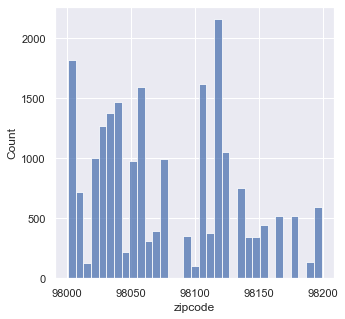

In [86]:
sns.set(rc = {'figure.figsize':(5,5)})

sns.histplot(kc_house_df['zipcode'])

# As we can see the zipcodes are distributed acorss the spectrum making it a vaible candidate for being
# considered as a categorical feature. 
# ALso, we can see that all different 70 zipcodes have atleast 50 or more datapoints, hence we will go
# ahead and create 70-1 different categories from it via one hot encoding. 

In [87]:
kc_house_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [88]:
#of the above features, Renovation and waterfront are categorical features and 
#lets separate them from discrete variables
cat_df = pd.DataFrame()
cat_df['Renovation'] = discrete_df['Renovation']
cat_df['waterfront'] = discrete_df['waterfront']
cat_df['zipcode'] = discrete_df['zipcode']
cat_df['view'] = discrete_df['view']
# We are considering view as a categorical features as the info we had was incomplete and https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/
# provided the correct details: 'An index from 0 to 4 of how good the view of the property was'

discrete_df.drop(['waterfront', 'Renovation', 'zipcode', 'view'], axis=1, inplace=True)

<ipython-input-88-5eb6dd604589>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.drop(['waterfront', 'Renovation', 'zipcode', 'view'], axis=1, inplace=True)


In [89]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21597 non-null  int64  
 1   floors        21597 non-null  float64
 2   condition     21597 non-null  int64  
 3   yr_renovated  21597 non-null  float64
 4   year_sold     21597 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 843.8 KB


In [90]:
final_df = cat_df.copy()

In [91]:
def category_ohe_multcols(multscolumns):
    df_final = final_df
    i=0
    for fields in multscolumns:
        df1=pd.get_dummies(final_df[fields],drop_first=True, prefix=fields)
        
        final_df.drop([fields], axis=1, inplace = True)
        if i==0:
            df_final=df1.copy()
            
        else:
            df_final=pd.concat([df_final, df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df, df_final], axis=1)
    
    return df_final

In [92]:
final_df = category_ohe_multcols(cat_df.columns)

In [93]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df.shape

(21597, 75)

In [94]:
preprocessed = pd.concat([cont_log, final_df, discrete_df], axis=1)
preprocessed

,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,3,0.0,2014
1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,1991.0,2014
2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3,0.0,2015
3,0.499698,0.070561,-0.523969,1.372094,-0.282087,-0.545897,0.464305,-1.272122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,5,0.0,2014
4,0.178433,-0.292847,0.008081,-0.785188,0.410186,-0.046448,-0.080492,1.200812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,3,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.483049,-0.513318,-2.171142,-0.785188,1.004017,-2.019795,-1.656229,-0.938134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,3,0.0,2014
21593,-0.282955,0.457935,-0.356962,-0.785188,-0.355000,-0.097176,-2.754982,-1.051832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2.0,3,0.0,2015
21594,-0.273006,-1.468954,-1.975055,-0.785188,0.248778,-1.668985,-1.656229,-0.604146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,3,0.0,2014
21595,-0.282955,-0.407862,-1.343051,-0.785188,-0.183210,-2.215512,-0.962994,1.030265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,0.0,2015


In [95]:
from pathlib import Path
filepath = Path('data/preprocessed.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
preprocessed.to_csv(filepath)

In [96]:
preprocessed.shape

(21597, 88)

In [97]:

# X = preprocessed.drop('price_norm', axis=1)
# y = preprocessed['price_norm']
# import statsmodels.api as sm
# X_int = sm.add_constant(X)
# model = sm.OLS(y, X_int).fit()
# model.summary()

In [98]:
# corr= preprocessed.corr()
# corr.sort_values(["price_norm"], ascending = False, inplace = True)
# print("Correlation with price showing the most important features in decreasing order:")
# print(corr.price_norm)

## Baseline Model

In [99]:
baseline_vars = ['sqft_living', 'lat', 'floors'] # top 3 highly correlated variable with price
y_var = ['price']
df_sm = kc_house_df[baseline_vars + y_var]
df_sm.head()

,sqft_living,lat,floors,price
0,1180,47.5112,1.0,221900.0
1,2570,47.7210,2.0,538000.0
2,770,47.7379,1.0,180000.0
3,1960,47.5208,1.0,604000.0
4,1680,47.6168,1.0,510000.0


In [100]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   lat          21597 non-null  float64
 2   floors       21597 non-null  float64
 3   price        21597 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 675.0 KB


In [101]:
# sns.pairplot(df_sm)

In [102]:
X = df_sm.drop(y_var, axis=1)
y = df_sm[y_var]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [104]:
X_train.head()

,sqft_living,lat,floors
6405,1880,47.5664,2.0
937,2020,47.3545,1.0
19076,4720,47.4536,2.0
15201,1430,47.6844,1.0
13083,2270,47.3451,1.0


In [105]:
y_train = y_train.to_numpy()
y_train

array([[529000.],
       [253000.],
       [745000.],
       ...,
       [299800.],
       [245000.],
       [545000.]])

In [106]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 3) (5400, 3)
(16197, 1) (5400, 1)


In [107]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [108]:
linreg.fit(X_train, y_train)

LinearRegression()

In [109]:
y_train_preds = linreg.predict(X_train)
y_train_preds

array([[ 490268.34670944],
       [ 375532.96475269],
       [1185937.34544752],
       ...,
       [ 452225.93844472],
       [  17665.74301893],
       [ 853090.27874765]])

In [110]:
y_val_preds = linreg.predict(X_val)
y_val_preds

array([[ 161860.3464635 ],
       [ 480637.22020853],
       [ 403720.74968103],
       ...,
       [ 910935.32054687],
       [1435009.80614693],
       [ 120952.07441378]])

In [111]:
print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))

2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [112]:
y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()
y_train = y_train.ravel()
print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)

1
1
1


In [113]:
print(y_val.ndim)
y_val = y_val.to_numpy().ravel()
print(y_val.ndim)

2
1


In [114]:
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_preds)
r2_val = r2_score(y_val, y_val_preds)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_val = mean_squared_error(y_val, y_val_preds)

print(f'R2 train: {r2_train} R2 validation: {r2_val}')
print(f'MSE train: {mse_train: .3e} MSE validation: {mse_val: .3e}')

R2 train: 0.5631624799107395 R2 validation: 0.5735339250706775
MSE train:  5.862e+10 MSE validation:  5.851e+10


In [115]:
def adj_r2_score(r2, n_samples, n_regressors):
    factor = (n_samples - 1) / (n_samples - n_regressors - 1)
    return 1 - ((1-r2) * factor)


In [116]:
adj_r2_train = adj_r2_score(r2_train, len(X_train), len(X_train.columns))
adj_r2_val = adj_r2_score(r2_val, len(X_val), len(X_val.columns))
print(f'Adj. R2 train: {adj_r2_train} Adj. R2 val: {adj_r2_val}')

Adj. R2 train: 0.5630815491035841 Adj. R2 val: 0.5732968238429554


In [117]:
# sns.scatterplot(x=y_train_preds, y=y_train)
# sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
# plt.title('Actual v Predicted Sale Price (Training Set)')
# plt.xlabel('Predicated House Price ($)')
# plt.ylabel('Actual House Price ($)')

In [118]:
# sns.scatterplot(x=y_val_preds, y=y_val)
# sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
# plt.title('Actual v Predicted Sale Price (Validation Set)')
# plt.xlabel('Predicated House Price ($)')
# plt.ylabel('Actual House Price ($)')

<AxesSubplot:ylabel='Count'>

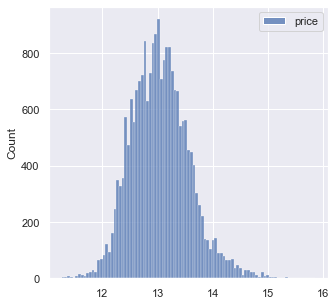

In [119]:
y= np.log1p(y)
sns.histplot(y)

In [120]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))
print(type(y_val))

2
2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [121]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()

y_val = y_val.to_numpy()
y_val = y_val.ravel()


print(type(y_train))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [122]:
y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)

1
1
1
1


In [123]:
# sns.scatterplot(x=y_train_preds, y=y_train)
# sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
# plt.title('Log Prices v Predicted Sale Price (Training Set)')
# plt.xlabel('Predicated House Price ($)')
# plt.ylabel('Log House Price ($)')

In [124]:
# sns.scatterplot(x=y_val_preds, y=y_val)
# sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
# plt.title('Log Prices v Predicted Sale Price (Validation Set)')
# plt.xlabel('Predicated House Price ($)')
# plt.ylabel('Log House Price ($)')

In [125]:
# here we can observe that just by taking log of the prices, fits for both the train and test have significantly improved

In [126]:
r2_train = r2_score(y_train, y_train_preds)
r2_val = r2_score(y_val, y_val_preds)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_val = mean_squared_error(y_val, y_val_preds)

print(f'R2 train: {r2_train} R2 validation: {r2_val}')
print(f'MSE train: {mse_train: .3e} MSE validation: {mse_val: .3e}')

R2 train: 0.655522586819101 R2 validation: 0.6616074592590563
MSE train:  9.581e-02 MSE validation:  9.291e-02


In [127]:
adj_r2_train = adj_r2_score(r2_train, len(X_train), len(X_train.columns))
adj_r2_val = adj_r2_score(r2_val, len(X_val), len(X_val.columns))
print(f'Adj. R2 train: {adj_r2_train} Adj. R2 val: {adj_r2_val}')

Adj. R2 train: 0.6554587671291398 Adj. R2 val: 0.6614193240436703


In [128]:
## Cross Validation

from sklearn.model_selection import cross_validate
scores = cross_validate(linreg, X, y, cv=5,
                         scoring=['r2', 'neg_mean_squared_error'],
                         return_train_score=True)
scores


{'fit_time': array([0.00498724, 0.00697875, 0.00398779, 0.00398946, 0.00498652]),
 'score_time': array([0.0029912 , 0.00498605, 0.00299168, 0.00498652, 0.00598454]),
 'test_r2': array([0.65509888, 0.6464851 , 0.63826243, 0.65683726, 0.68326219]),
 'train_r2': array([0.65750595, 0.65952553, 0.66132603, 0.657019  , 0.64965308]),
 'test_neg_mean_squared_error': array([-0.09936066, -0.09760491, -0.09640403, -0.09906907, -0.08321982]),
 'train_neg_mean_squared_error': array([-0.094015  , -0.09445719, -0.09476016, -0.09410346, -0.09805391])}

In [129]:
#avg_score of all the 5 splits from cross validation above
avg_score = {k: np.mean(v) for k,v in scores.items()}
avg_score

{'fit_time': 0.004985952377319336,
 'score_time': 0.004387998580932617,
 'test_r2': 0.6559891737343168,
 'train_r2': 0.6570059176509846,
 'test_neg_mean_squared_error': -0.09513169766069114,
 'train_neg_mean_squared_error': -0.09507794377129371}

In [130]:
eval_list = list()
avg_score['dataset'] = 'baseline'
avg_score['n_features'] = len(X.columns)
eval_list.append(avg_score)
pd.DataFrame(eval_list)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3


In [131]:
def get_avg_cv_score(X, y, regmodel, setname, scoring=None):
    if scoring is None:
        scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(linreg, X, y, cv=5,
                         scoring=scoring,
                         return_train_score=True)
    avg_score = {k: np.mean(v) for k,v in scores.items()}
    avg_score['dataset'] = setname
    avg_score['n_features'] = len(X.columns)
    return avg_score
    

In [132]:
X = continuous_df.drop('price', axis=1)
y = y # remember y is already normalized. 

In [133]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'cont features pre scaling')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6


In [134]:
#We can see an almost negligible increase in r2 values for both test and train data. 
# Now we can try with normalized and scaled cont features

In [135]:
cont_log = cont_log.drop('price_norm', axis=1)

In [136]:
X= cont_log
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)


In [137]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 7) (5400, 7)
(16197, 1) (5400, 1)


In [138]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'cont(scaled) features')


In [139]:
eval_list.append(avg_scores)
pd.DataFrame(eval_list)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7


In [140]:
# We can see that both r2 values have slightly decreased as well as both mean sqrd errors have increased

In [141]:
X = final_df
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 75) (5400, 75)
(16197, 1) (5400, 1)


In [142]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'ohe cat features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75


In [143]:
discrete_df.head(2)

,bedrooms,floors,condition,yr_renovated,year_sold
0,3,1.0,3,0.0,2014
1,3,2.0,3,1991.0,2014


In [144]:
X = discrete_df

In [145]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 5) (5400, 5)
(16197, 1) (5400, 1)


In [146]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'discrete features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5


In [147]:
X= preprocessed.drop('price_norm', axis=1)
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'cont(scaled) + discrete + cat features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87


In [148]:
# We can see significant increase in r2 train and test as well as significant reduction in mean sqrd error for both test
# and train data sets. Hence, we can see that adding all these features does improve the model 


### Recursive feature elimination

In [149]:
X = preprocessed.drop('price_norm', axis=1)

In [150]:
X.head(2)

,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,3,0.0,2014
1,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,1991.0,2014


In [151]:
from sklearn.feature_selection import RFE

In [152]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
n_feats = 5
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector=selector.fit(X_train, y_train)


In [153]:
selector.ranking_

array([34, 62, 74, 61, 82, 71, 68, 70, 20, 80, 64,  1,  6,  7, 15, 23, 51,
       37, 45, 47, 59, 78, 28, 19, 41, 17, 66, 65, 77,  9, 31, 56,  1,  1,
       60, 44, 14, 12, 58, 46, 55, 43, 40, 38, 27, 13,  8, 11, 63,  5, 22,
        3, 49, 25, 50,  2,  1, 18, 21, 24, 36,  4, 16, 32, 33, 35, 30, 29,
       52, 57, 39, 48, 76, 26, 67, 72, 79, 10, 53, 54, 42,  1, 75, 83, 73,
       81, 69])

In [154]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False])

In [155]:
top_cols = X.columns[selector.support_]

In [156]:
top_cols

Index(['zipcode_98004', 'zipcode_98039', 'zipcode_98040', 'zipcode_98112',
       'view_4.0'],
      dtype='object')

In [157]:
X = preprocessed[top_cols]
X.head(2)

,zipcode_98004,zipcode_98039,zipcode_98040,zipcode_98112,view_4.0
0,0,0,0,0,0
1,0,0,0,0,0


In [158]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, f'{n_feats} features via RFE')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5


In [159]:
# As you can see even with top 5 features the r2 scores and neg mean sqrd error score for both train and test sets
# are impressive. Imp to note that these 5 feats are combination of categorical and cont(scaled) features

In [160]:
### Try polynominals features for the top 5 most imp features

#Top 5 features = 'sqft_living_norm', 'lat_norm', 'Renovation_1.0', 'waterfront_1.0', 'view' 

polynomial = pd.DataFrame()

polynomial["sqft_living_norm-s2"] = preprocessed["sqft_living_norm"] ** 2
polynomial["sqft_living_norm-s3"] = preprocessed["sqft_living_norm"] ** 3
polynomial["sqft_living_norm-Sq"] = np.sqrt(preprocessed["sqft_living_norm"])

polynomial["lat_norm-s2"] = preprocessed["lat_norm"] ** 2
polynomial["lat_norm-s3"] = preprocessed["lat_norm"] ** 3
polynomial["lat_norm-Sq"] = np.sqrt(preprocessed["lat_norm"])

polynomial["Renovation_1.0-s2"] = preprocessed["Renovation_1.0"] ** 2
# polynomial["Renovation_1.0-s3"] = preprocessed["Renovation_1.0"] ** 3 no need for cube as these are binary values
polynomial["Renovation_1.0-Sq"] = np.sqrt(preprocessed["Renovation_1.0"])

polynomial["waterfront_1.0-s2"] = preprocessed["waterfront_1.0"] ** 2
# polynomial["waterfront_1.0-s3"] = preprocessed["waterfront_1.0"] ** 3 no need for cube as these are binary values
polynomial["waterfront_1.0-Sq"] = np.sqrt(preprocessed["waterfront_1.0"])




preprocessed.head(3)





C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,3,0.0,2014
1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,1991.0,2014
2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3,0.0,2015


In [161]:
polynomial.head(3)

,sqft_living_norm-s2,sqft_living_norm-s3,sqft_living_norm-Sq,lat_norm-s2,lat_norm-s3,lat_norm-Sq,Renovation_1.0-s2,Renovation_1.0-Sq,waterfront_1.0-s2,waterfront_1.0-Sq
0,1.266893,-1.425969,NaN,0.123475,-0.043388,NaN,0,0.0,0,0.0
1,0.503272,0.357029,0.842269,1.345705,1.561079,1.077054,1,1.0,0,0.0
2,4.542942,-9.682908,NaN,1.642274,2.104595,1.132039,0,0.0,0,0.0


In [162]:
# Since the polynomial df have infinite or nan values lets inspect that first
polynomial.describe()

,sqft_living_norm-s2,sqft_living_norm-s3,sqft_living_norm-Sq,lat_norm-s2,lat_norm-s3,lat_norm-Sq,Renovation_1.0-s2,Renovation_1.0-Sq,waterfront_1.0-s2,waterfront_1.0-Sq
count,21597.000000,2.159700e+04,10872.000000,2.159700e+04,21597.000000,11599.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.999954,-2.666647e-02,0.826801,9.999537e-01,-0.490119,0.828823,0.034449,0.034454,0.006760,0.006760
std,1.385753,3.820057e+00,0.338440,1.153290e+00,2.783231,0.290413,0.182384,0.182251,0.081944,0.081909
min,0.000005,-5.737128e+01,0.047131,1.217873e-09,-25.050963,0.005907,0.000000,0.000000,0.000000,0.000000
25%,0.103278,-3.043432e-01,0.576333,1.242905e-01,-0.263401,0.658755,0.000000,0.000000,0.000000,0.000000
50%,0.474982,8.955285e-07,0.825670,6.296693e-01,0.000633,0.901078,0.000000,0.000000,0.000000,0.000000
75%,1.359209,3.299329e-01,1.073091,1.553260e+00,0.615854,1.054456,0.000000,0.000000,0.000000,0.000000
max,21.421819,9.914813e+01,2.151365,8.561495e+00,3.845444,1.251674,1.000000,1.000000,1.000000,1.000000


In [163]:
# The only features that seems to create nuisance for us is sqft_living_norm-Sq as it has nan values

polynomial.isnull().sum()

sqft_living_norm-s2        0
sqft_living_norm-s3        0
sqft_living_norm-Sq    10725
lat_norm-s2                0
lat_norm-s3                0
lat_norm-Sq             9998
Renovation_1.0-s2          0
Renovation_1.0-Sq          0
waterfront_1.0-s2          0
waterfront_1.0-Sq          0
dtype: int64

In [164]:
polynomial.drop(['sqft_living_norm-Sq','lat_norm-Sq'], axis=1, inplace=True)
polynomial.head(1)

,sqft_living_norm-s2,sqft_living_norm-s3,lat_norm-s2,lat_norm-s3,Renovation_1.0-s2,Renovation_1.0-Sq,waterfront_1.0-s2,waterfront_1.0-Sq
0,1.266893,-1.425969,0.123475,-0.043388,0,0.0,0,0.0


In [165]:
polynomials_norm_cols = list()
for c in polynomial.columns:
    polynomials_norm_col= f'{c}_norm'
    polynomial[polynomials_norm_col] = (polynomial[c] - polynomial[c].mean()) / polynomial[c].std()
    polynomials_norm_cols.append(polynomials_norm_col)
    polynomial.drop(axis=1, columns = c, inplace = True)
polynomial

,sqft_living_norm-s2_norm,sqft_living_norm-s3_norm,lat_norm-s2_norm,lat_norm-s3_norm,Renovation_1.0-s2_norm,Renovation_1.0-Sq_norm,waterfront_1.0-s2_norm,waterfront_1.0-Sq_norm
0,0.192632,-0.366304,-0.759981,0.160508,-0.188883,-0.189087,-0.082498,-0.08252
1,-0.358420,0.100442,0.299796,0.736984,5.294046,5.296875,-0.082498,-0.08252
2,2.556725,-2.527775,0.556946,0.932267,-0.188883,-0.189087,-0.082498,-0.08252
3,-0.718003,0.007073,-0.798048,0.168032,-0.188883,-0.189087,-0.082498,-0.08252
4,-0.659710,0.000406,-0.721155,0.200894,-0.188883,-0.189087,-0.082498,-0.08252
...,...,...,...,...,...,...,...,...
21592,-0.531450,-0.028426,0.007020,0.539739,-0.188883,-0.189087,-0.082498,-0.08252
21593,-0.570267,0.032119,-0.757770,0.160023,-0.188883,-0.189087,-0.082498,-0.08252
21594,0.835554,-0.822783,-0.813380,0.181629,-0.188883,-0.189087,-0.082498,-0.08252
21595,-0.601552,-0.010781,-0.837940,0.173888,-0.188883,-0.189087,-0.082498,-0.08252


In [166]:
# Now we can proceed to check the significance of these polynomial features to our model 

X=polynomial
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, '13 polynomial features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)



(16197, 8) (5400, 8)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8


In [167]:
# Combining these polynomials with our preprocessed df

X = preprocessed.drop('price_norm', axis=1) 
X= pd.concat([X, polynomial], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'preprocessed + polynomial ')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)


(16197, 95) (5400, 95)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95


In [168]:
# As we can see with the addition of polynomial features to our preprocessed features we have significant
# increase in the values of r2 for both train and test data as well as the minimum mean squared error till now.
# Hence, going forward we will consider these features along with preprocessed features while apply RFE. 

In [169]:
## During data clearning and while preprocessing the data, we did drop quite a few features mainly due to multicollinearity

dropped_features= pd.DataFrame()

dropped_features['sqft_above'] = np.log1p(kc_house_df.sqft_above)
dropped_features['sqft_living15'] = np.log1p(kc_house_df.sqft_living15)
dropped_features['yr_built'] = kc_house_df.yr_built
dropped_features['date'] = kc_house_df.year_sold
dropped_features['bathrooms'] = kc_house_df.bathrooms
dropped_features['Time_since_renovation'] = kc_house_df.Time_since_renovation
dropped_features['grade'] = kc_house_df.grade

dropped_features.columns

Index(['sqft_above', 'sqft_living15', 'yr_built', 'date', 'bathrooms',
       'Time_since_renovation', 'grade'],
      dtype='object')

In [170]:
X=dropped_features
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, '7 dropped features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 7) (5400, 7)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95
9,0.005587,0.003987,0.619850,0.627552,-0.104954,-0.103237,7 dropped features,7


In [171]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'preprocessed + polynomials +7 dropped feat')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 102) (5400, 102)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95
9,0.005587,0.003987,0.619850,0.627552,-0.104954,-0.103237,7 dropped features,7


In [172]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
n_feats = 10
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector=selector.fit(X_train, y_train)



In [173]:
selector.ranking_


array([23, 54, 90, 28, 78, 62, 61,  1,  1, 82, 77,  2, 18, 21, 39, 52, 29,
       72, 30, 27, 76, 59, 85, 36, 57, 37, 86, 49, 45, 16, 79, 43,  1,  8,
       66, 60, 53, 70, 40, 50, 47, 84, 64, 73, 67, 80, 65, 83, 69,  6, 10,
        7, 55, 12, 42,  5,  3, 13, 14, 11, 75,  4, 15, 71, 22, 58, 19, 20,
       46, 56, 92, 74, 24, 38, 31, 41, 48,  9, 34, 35, 25, 17, 87, 63, 51,
       89,  1, 81, 91, 33, 32,  1,  1,  1,  1, 26,  1, 93,  1, 68, 88, 44])

In [174]:
selector.support_



array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False, False])

In [175]:
top_cols = X.columns[selector.support_]
top_cols

Index(['Renovation_1.0', 'waterfront_1.0', 'zipcode_98039', 'year_sold',
       'Renovation_1.0-s2_norm', 'Renovation_1.0-Sq_norm',
       'waterfront_1.0-s2_norm', 'waterfront_1.0-Sq_norm', 'sqft_living15',
       'date'],
      dtype='object')

In [185]:
top_cols.shape

(10,)

In [176]:
type(top_cols)

pandas.core.indexes.base.Index

In [177]:
type(top_cols.to_numpy())

numpy.ndarray

In [178]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[[ 5.78398011e+11  5.21210273e+10  9.46582584e-01  1.57969850e+09
  -9.67487900e+09 -9.57628476e+10 -8.91096604e+11  8.86531086e+11
   9.57405414e-01 -1.57969850e+09]]
[-2.02923379e+10]


In [191]:
estimators.coef_ = estimators.coef_.reshape(-1,1)

In [197]:
top_10_features = pd.DataFrame()
top_10_features['top_10_features'] = top_cols
top_10_features['coeffecients'] = estimators.coef_[:]
top_10_features['index'] = range(1,11)
top_10_features.set_index('index', inplace = True)
top_10_features

,top_10_features,coeffecients
index,,
1,Renovation_1.0,5.783980e+11
2,waterfront_1.0,5.212103e+10
3,zipcode_98039,9.465826e-01
4,year_sold,1.579698e+09
5,Renovation_1.0-s2_norm,-9.674879e+09
6,Renovation_1.0-Sq_norm,-9.576285e+10
7,waterfront_1.0-s2_norm,-8.910966e+11
8,waterfront_1.0-Sq_norm,8.865311e+11
9,sqft_living15,9.574054e-01


## Regression result

### You will notice that the coefficient for these features will be differernt if we look at the array of 102 features below. This is because we are currently only looking at top 10 features. 

### So the top ten features for our regression models are : 

### 1. Renovation_1.0 - which represents houses which are renovated 
### 2. waterfront_1.0 - which represents a house with a waterfront
### 3. zipcode_98039
### 4. year_sold
### 5. Renovation_1.0-s2_norm
### 6. Renovation_1.0-Sq_norm
### 7. waterfront_1.0-s2_norm
### 8. waterfront_1.0-Sq_norm
### 9. sqft_living15
### 10. date

### The reason I am representing top 8 features is too provide context on the degree to which our # house predication is dependant on renovation and waterfront. 







In [198]:
# If we take jsut these 10 variables to build our model, how will we do?

X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X = X[top_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'top10(of 102) feats via RFE ')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 10) (5400, 10)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95
9,0.005587,0.003987,0.619850,0.627552,-0.104954,-0.103237,7 dropped features,7


In [199]:
X.shape

(21597, 10)

In [200]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)


train_r2_scores = list()
train_adj_r2_scores= list()
train_mse_values = list()

test_r2_scores = list()
test_adj_r2_scores = list()
test_mse_values = list()

n_feat_values = list()

for n_feats in range(3, len(X.columns)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    selector=RFE(linreg, n_features_to_select=n_feats, step=1)
    selector=selector.fit(X_train, y_train)

    top_cols = X.columns[selector.support_]

    X_sm = X[top_cols]
    X_train, X_val, y_train, y_val = train_test_split(X_sm, y, test_size=0.25, random_state=42)

    sm_linreg = LinearRegression()
    sm_linreg.fit(X_train, y_train)

    y_train_preds = sm_linreg.predict(X_train)
    y_val_preds = sm_linreg.predict(X_val)

    train_r2_scores.append(r2_score(y_train, y_train_preds))
    train_mse_values.append(mean_squared_error(y_train, y_train_preds))
    train_adj_r2_scores.append(adj_r2_score(train_r2_scores[-1], len(X_train), len(X_train.columns)))

    test_r2_scores.append(r2_score(y_val, y_val_preds))
    test_mse_values.append(mean_squared_error(y_val, y_val_preds))
    test_adj_r2_scores.append(adj_r2_score(test_r2_scores[-1], len(X_val), len(X_val.columns)))


    n_feat_values.append(n_feats)
        


    





Text(0.5, 1.0, 'train_R2_scores')

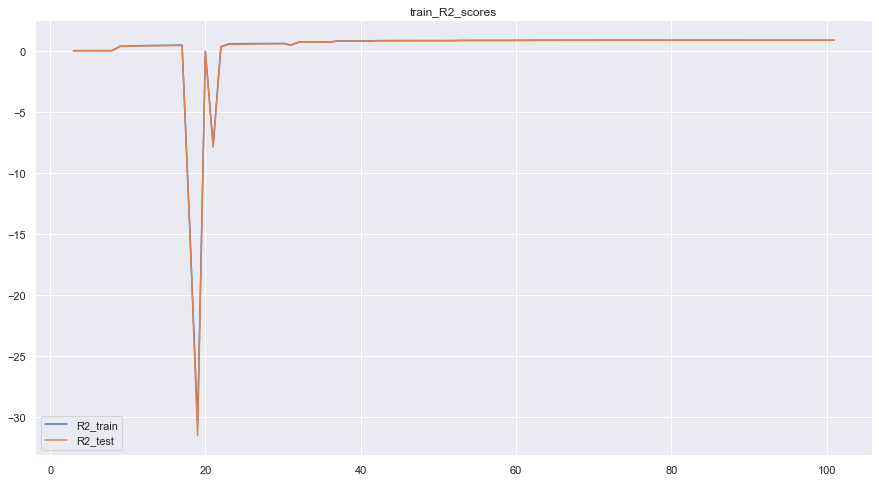

In [201]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=n_feat_values, y=train_r2_scores, label= "R2_train")
sns.lineplot(x=n_feat_values, y=test_r2_scores, label= "R2_test")
plt.title('train_R2_scores')

[0.0315881707730683, 0.04064139346472939, 0.0405722605261869, 0.0405274934591654, 0.04068442413344264, 0.04062877041555235, 0.3995562526115337, 0.40742554875642645, 0.42766255552727417, 0.44652199781116475, 0.4573732228067924, 0.46289543168424707, 0.4685723124798107, 0.47907753813721965, 0.4877646766815793, -14.654212599901658, -30.601795672590924, -0.019190686669467327, -7.725133444744065, 0.3618908965528731, 0.5816094414173406, 0.5918417570982607, 0.6053929048661411, 0.6116679659790911, 0.615119391277878, 0.6201826327285016, 0.6229506074503742, 0.6357806096538827, 0.4979254476947773, 0.7332129575644827, 0.7353515617369233, 0.737559448980029, 0.7407350762017832, 0.7408011753301126, 0.8257749941911524, 0.8263475146515422, 0.8269472058885494, 0.827648314688634, 0.828697443183963, 0.8524324144647192, 0.8539789140841175, 0.8562634001855474, 0.8573481877287605, 0.8581403258351017, 0.8587137714324293, 0.8590249846348145, 0.859620924882489, 0.8599094177128817, 0.8602323919032844, 0.860824131

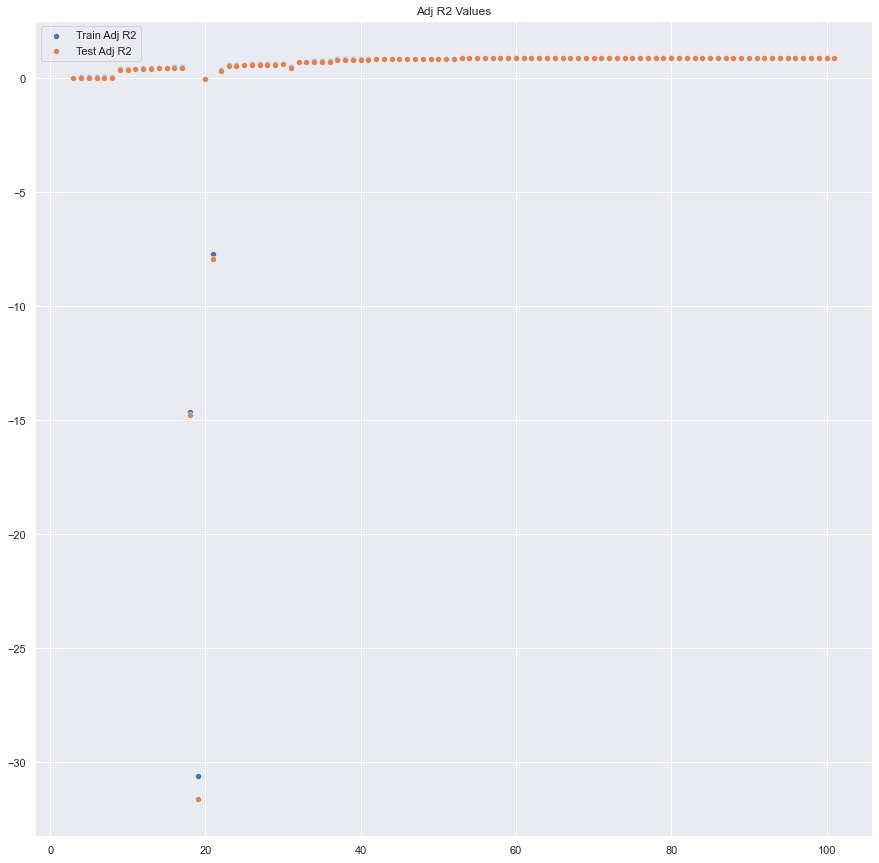

In [202]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(x=n_feat_values, y=train_adj_r2_scores, label='Train Adj R2')
sns.scatterplot(x=n_feat_values, y=test_adj_r2_scores, label='Test Adj R2')
plt.title('Adj R2 Values')
print(train_adj_r2_scores)    

In [203]:
(train_adj_r2_scores[0])

0.0315881707730683

Text(0.5, 1.0, 'MSE Values')

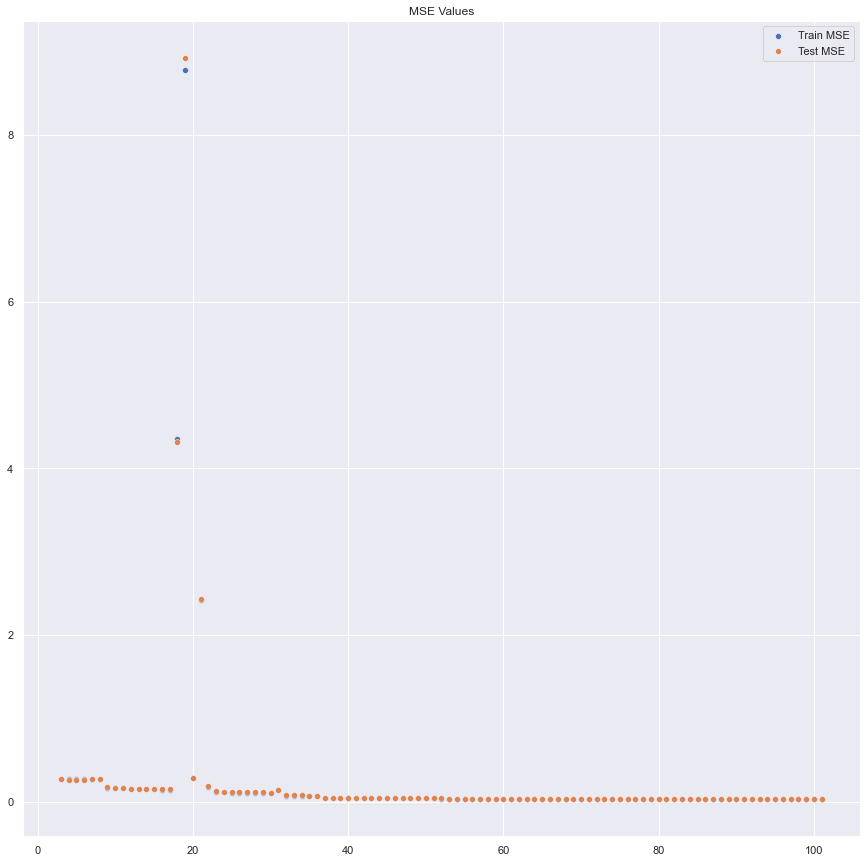

In [204]:
sns.scatterplot(x=n_feat_values, y=train_mse_values, label='Train MSE')
sns.scatterplot(x=n_feat_values, y=test_mse_values, label='Test MSE')
plt.title('MSE Values')

In [205]:
X.columns

Index(['sqft_living_norm', 'sqft_lot_norm', 'sqft_basement_norm', 'lat_norm',
       'sqft_lot15_norm', 'Age_house_norm', 'long_norm', 'Renovation_1.0',
       'waterfront_1.0', 'zipcode_98002',
       ...
       'Renovation_1.0-Sq_norm', 'waterfront_1.0-s2_norm',
       'waterfront_1.0-Sq_norm', 'sqft_above', 'sqft_living15', 'yr_built',
       'date', 'bathrooms', 'Time_since_renovation', 'grade'],
      dtype='object', length=102)

## Finally, predictions

In [206]:
len(X.columns)

102

In [207]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)

LinearRegression()

In [208]:
y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)

In [209]:
print(y_train_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)
print(y_val_preds.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))
print(type(y_val))

2
2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [210]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()

y_val = y_val.to_numpy()
y_val = y_val.ravel()


print(type(y_train))
print(type(y_val))

y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()

print(type(y_train_preds))
print(type(y_val_preds))

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
1
1
1


Text(0, 0.5, 'Actual house prices($)')

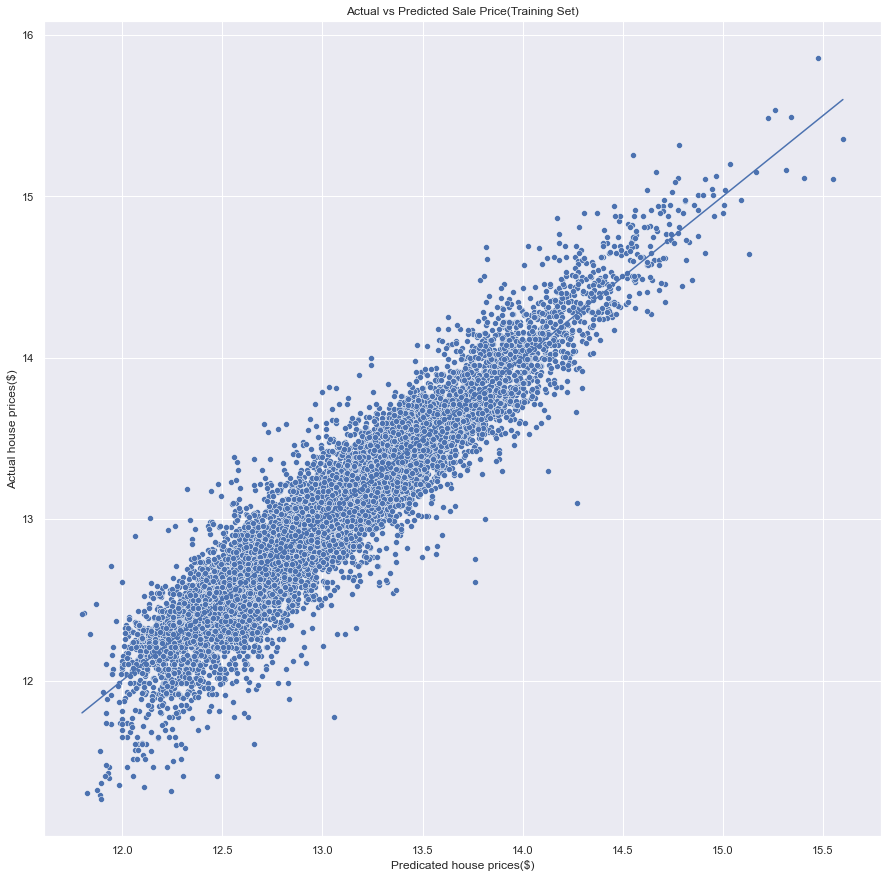

In [211]:
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds)
plt.title('Actual vs Predicted Sale Price(Training Set)')
plt.xlabel('Predicated house prices($)')
plt.ylabel('Actual house prices($)')

Text(0, 0.5, 'Actual house prices($)')

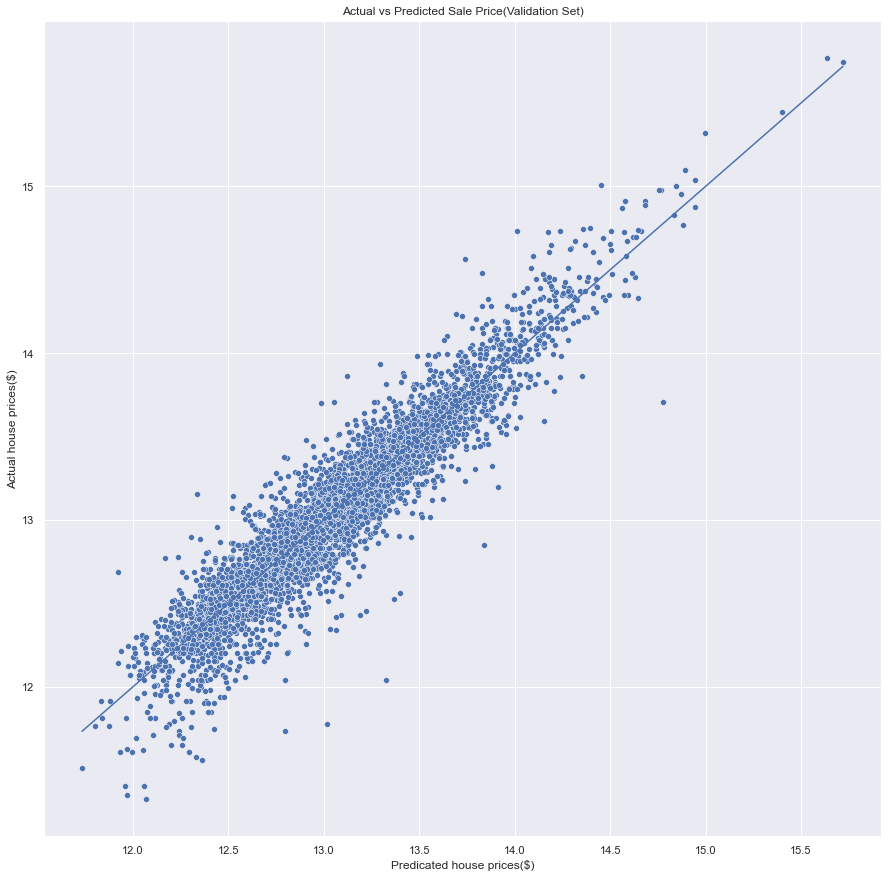

In [212]:
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds)
plt.title('Actual vs Predicted Sale Price(Validation Set)')
plt.xlabel('Predicated house prices($)')
plt.ylabel('Actual house prices($)')

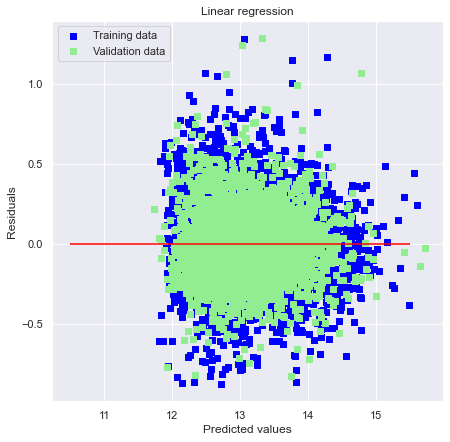

In [220]:
sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(y_train_preds, y_train_preds - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_preds, y_val_preds - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 15.5, color = "red")
plt.show()

### Regularization

In [214]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2)

In [215]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
avg_scores = get_avg_cv_score(X, y, ridge, f'Ridge w/ alpha =2')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95
9,0.005587,0.003987,0.619850,0.627552,-0.104954,-0.103237,7 dropped features,7


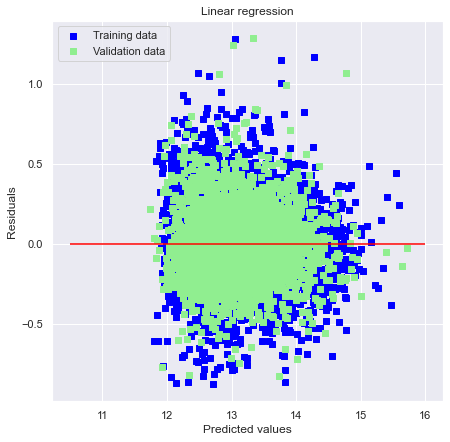

In [219]:
sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(y_train_preds, y_train_preds - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_preds, y_val_preds - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 16, color = "red")
plt.show()

In [216]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=2000, min_samples_leaf=1)

In [217]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
avg_scores = get_avg_cv_score(X, y, rfreg, f'Random Forest')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.004986,0.004388,0.655989,0.657006,-0.095132,-0.095078,baseline,3
1,0.004987,0.003391,0.658585,0.663126,-0.094323,-0.093378,cont features pre scaling,6
2,0.007776,0.003590,0.633704,0.640273,-0.101215,-0.099715,cont(scaled) features,7
3,0.038896,0.005186,0.610047,0.619745,-0.107476,-0.105390,ohe cat features,75
4,0.004787,0.003790,0.199790,0.204785,-0.221141,-0.220429,discrete features,5
5,0.047871,0.005785,0.864410,0.866867,-0.037483,-0.036904,cont(scaled) + discrete + cat features,87
6,0.004788,0.003988,0.171338,0.177186,-0.228851,-0.228071,5 features via RFE,5
7,0.006589,0.004182,0.449899,0.453306,-0.152064,-0.151541,13 polynomial features,8
8,0.059241,0.007181,0.872836,0.875177,-0.035160,-0.034601,preprocessed + polynomial,95
9,0.005587,0.003987,0.619850,0.627552,-0.104954,-0.103237,7 dropped features,7
